---------------------------------------------- Data Preprocessing  ------------------------------------------

Load the Dataset into a Pandas DataFrame

In [1]:
import pandas as pd

In [9]:
df = pd.read_csv('globalterrorismdb_0718dist.csv', encoding='latin1', low_memory=False)

Explore the Dataset to Understand its Structure and Features:

In [11]:
print(df.head())

        eventid  iyear  imonth  iday approxdate  extended resolution  country  \
0  197000000001   1970       7     2        NaN         0        NaN       58   
1  197000000002   1970       0     0        NaN         0        NaN      130   
2  197001000001   1970       1     0        NaN         0        NaN      160   
3  197001000002   1970       1     0        NaN         0        NaN       78   
4  197001000003   1970       1     0        NaN         0        NaN      101   

          country_txt  region  ... addnotes scite1 scite2  scite3  dbsource  \
0  Dominican Republic       2  ...      NaN    NaN    NaN     NaN      PGIS   
1              Mexico       1  ...      NaN    NaN    NaN     NaN      PGIS   
2         Philippines       5  ...      NaN    NaN    NaN     NaN      PGIS   
3              Greece       8  ...      NaN    NaN    NaN     NaN      PGIS   
4               Japan       4  ...      NaN    NaN    NaN     NaN      PGIS   

   INT_LOG  INT_IDEO INT_MISC INT_ANY 

In [13]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB
None


In [15]:
print(df.describe(include='all'))

             eventid          iyear         imonth           iday  \
count   1.816910e+05  181691.000000  181691.000000  181691.000000   
unique           NaN            NaN            NaN            NaN   
top              NaN            NaN            NaN            NaN   
freq             NaN            NaN            NaN            NaN   
mean    2.002705e+11    2002.638997       6.467277      15.505644   
std     1.325957e+09      13.259430       3.388303       8.814045   
min     1.970000e+11    1970.000000       0.000000       0.000000   
25%     1.991021e+11    1991.000000       4.000000       8.000000   
50%     2.009022e+11    2009.000000       6.000000      15.000000   
75%     2.014081e+11    2014.000000       9.000000      23.000000   
max     2.017123e+11    2017.000000      12.000000      31.000000   

                   approxdate       extended resolution        country  \
count                    9239  181691.000000       2220  181691.000000   
unique                 

Handle Missing Values and Perform Data Cleaning

In [20]:
print(df.isnull().sum())


numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64


Use Dask to Handle Large Data Efficiently and Compare Performance with Pandas

In [31]:
import dask.dataframe as dd
import time

In [49]:
start_time = time.time()
df_dask = dd.read_csv('globalterrorismdb_0718dist.csv', encoding='ISO-8859-1')
dask_load_time = time.time() - start_time

print(f"Dask load time: {dask_load_time} seconds")

Dask load time: 0.0007681846618652344 seconds


In [51]:
start_time = time.time()
df_pandas = pd.read_csv('globalterrorismdb_0718dist.csv', encoding='ISO-8859-1', low_memory=False)
pandas_load_time = time.time() - start_time

print(f"Pandas load time: {pandas_load_time} seconds")

Pandas load time: 8.133708238601685 seconds


------------------------------------------------ Data Analysis ---------------------------------------------------

calculate the mean, median, and standard deviation of relevant numeric columns

In [54]:
import numpy as np

In [56]:
mean_values = df[numeric_cols].mean()
median_values = df[numeric_cols].median()
std_dev_values = df[numeric_cols].std()

In [58]:
print("Mean values:\n", mean_values)
print("Median values:\n", median_values)
print("Standard deviation values:\n", std_dev_values)

Mean values:
 eventid      2.002705e+11
iyear        2.002639e+03
imonth       6.467277e+00
iday         1.550564e+01
extended     4.534622e-02
                 ...     
nreleased   -1.661007e+00
INT_LOG     -4.543731e+00
INT_IDEO    -4.464398e+00
INT_MISC     9.000996e-02
INT_ANY     -3.945952e+00
Length: 77, dtype: float64
Median values:
 eventid      2.009022e+11
iyear        2.009000e+03
imonth       6.000000e+00
iday         1.500000e+01
extended     0.000000e+00
                 ...     
nreleased    0.000000e+00
INT_LOG     -9.000000e+00
INT_IDEO    -9.000000e+00
INT_MISC     0.000000e+00
INT_ANY      0.000000e+00
Length: 77, dtype: float64
Standard deviation values:
 eventid      1.325957e+09
iyear        1.325943e+01
imonth       3.388303e+00
iday         8.814045e+00
extended     2.080629e-01
                 ...     
nreleased    1.710689e+01
INT_LOG      4.543547e+00
INT_IDEO     4.637152e+00
INT_MISC     5.684573e-01
INT_ANY      4.691325e+00
Length: 77, dtype: float64


In [60]:
most_frequent_values = df[categorical_cols].mode().iloc[0]
print("Most frequent values:\n", most_frequent_values)

Most frequent values:
 approxdate                                        September 18-24, 2016
resolution                                                     8/4/1998
country_txt                                                        Iraq
region_txt                                   Middle East & North Africa
provstate                                                       Baghdad
city                                                            Unknown
location               The attack took place in Baghdad, Baghdad, Iraq.
summary               09/00/2016: Sometime between September 18, 201...
alternative_txt                              Insurgency/Guerilla Action
attacktype1_txt                                       Bombing/Explosion
attacktype2_txt                                           Armed Assault
attacktype3_txt                          Facility/Infrastructure Attack
targtype1_txt                               Private Citizens & Property
targsubtype1_txt                         

Use Pandas to Group Data and Calculate Aggregate Statistics

In [63]:
# Group by year and calculate the number of attacks per year
attacks_per_year = df.groupby('iyear').size()
print("Attacks per year:\n", attacks_per_year)

Attacks per year:
 iyear
1970      651
1971      471
1972      568
1973      473
1974      581
1975      740
1976      923
1977     1319
1978     1526
1979     2662
1980     2662
1981     2586
1982     2544
1983     2870
1984     3495
1985     2915
1986     2860
1987     3183
1988     3721
1989     4324
1990     3887
1991     4683
1992     5071
1994     3456
1995     3081
1996     3058
1997     3197
1998      934
1999     1395
2000     1814
2001     1906
2002     1333
2003     1278
2004     1166
2005     2017
2006     2758
2007     3242
2008     4805
2009     4721
2010     4826
2011     5076
2012     8522
2013    12036
2014    16903
2015    14965
2016    13587
2017    10900
dtype: int64


In [65]:
# Group by region and calculate the number of attacks per region
attacks_per_region = df.groupby('region_txt').size()
print("Attacks per region:\n", attacks_per_region)

Attacks per region:
 region_txt
Australasia & Oceania            282
Central America & Caribbean    10344
Central Asia                     563
East Asia                        802
Eastern Europe                  5144
Middle East & North Africa     50474
North America                   3456
South America                  18978
South Asia                     44974
Southeast Asia                 12485
Sub-Saharan Africa             17550
Western Europe                 16639
dtype: int64


In [67]:
attacks_per_attack_type = df.groupby('attacktype1_txt').size()
print("Attacks per attack type:\n", attacks_per_attack_type)

Attacks per attack type:
 attacktype1_txt
Armed Assault                          42669
Assassination                          19312
Bombing/Explosion                      88255
Facility/Infrastructure Attack         10356
Hijacking                                659
Hostage Taking (Barricade Incident)      991
Hostage Taking (Kidnapping)            11158
Unarmed Assault                         1015
Unknown                                 7276
dtype: int64


identify Trends Over Time

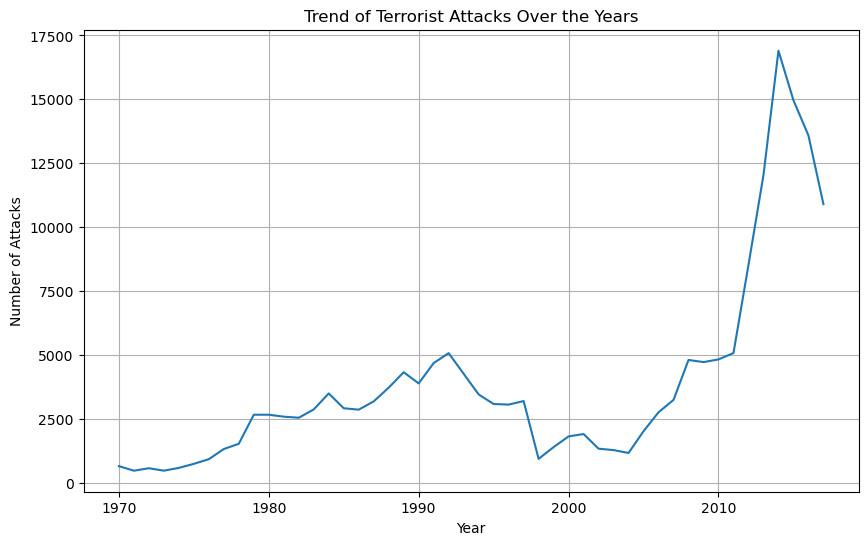

In [70]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(attacks_per_year.index, attacks_per_year.values)
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.title('Trend of Terrorist Attacks Over the Years')
plt.grid(True)
plt.show()

Determine the Most Affected Regions and Countries

In [73]:
# Group by country and calculate the number of attacks per country
attacks_per_country = df.groupby('country_txt').size().sort_values(ascending=False)
print("Most affected countries:\n", attacks_per_country.head(10))

Most affected countries:
 country_txt
Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
dtype: int64


Identify the Most Common Attack Types and Targets

In [76]:
# Group by target type and calculate the number of attacks per target type
attacks_per_target_type = df.groupby('targtype1_txt').size().sort_values(ascending=False)
print("Most common target types:\n", attacks_per_target_type.head(10))

Most common target types:
 targtype1_txt
Private Citizens & Property       43511
Military                          27984
Police                            24506
Government (General)              21283
Business                          20669
Transportation                     6799
Utilities                          6023
Unknown                            5898
Religious Figures/Institutions     4440
Educational Institution            4322
dtype: int64


------------------------------------------------------Data Visualization---------------------------------------

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

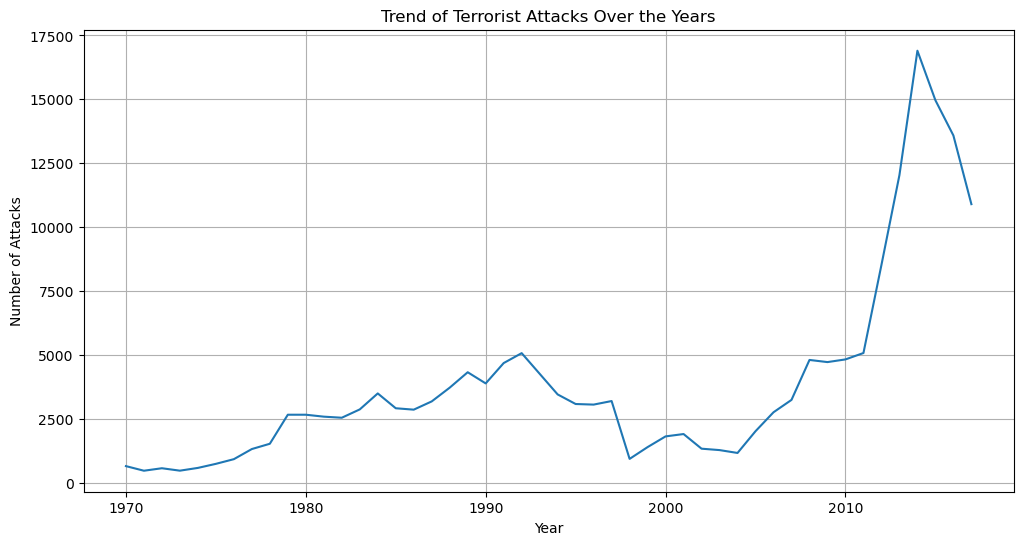

In [80]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=attacks_per_year.index, y=attacks_per_year.values)
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.title('Trend of Terrorist Attacks Over the Years')
plt.grid(True)
plt.show()

Bar Plot of the Number of Attacks by Region and by Country

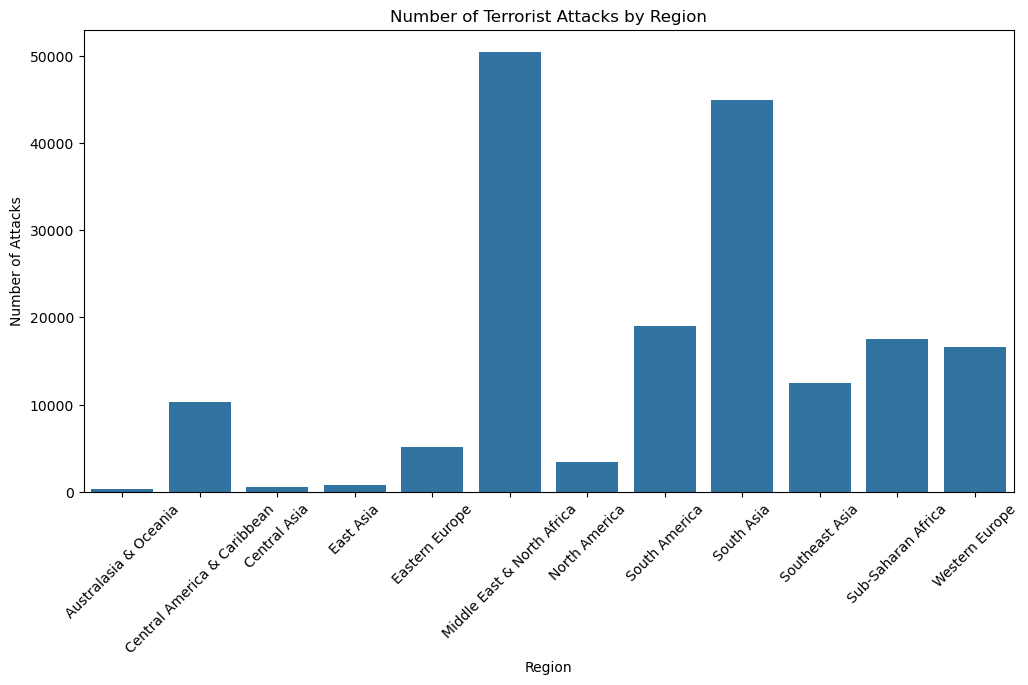

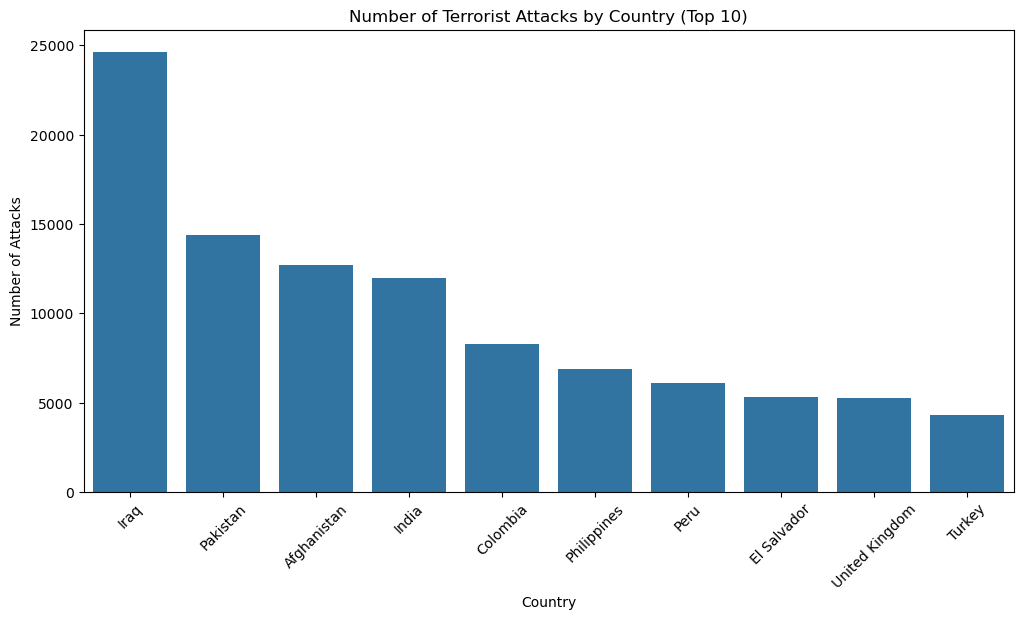

In [83]:
# Bar plot for number of attacks by region
plt.figure(figsize=(12, 6))
sns.barplot(x=attacks_per_region.index, y=attacks_per_region.values)
plt.xlabel('Region')
plt.ylabel('Number of Attacks')
plt.title('Number of Terrorist Attacks by Region')
plt.xticks(rotation=45)
plt.show()

# Bar plot for number of attacks by the top 10 countries
top_10_countries = attacks_per_country.head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_countries.index, y=top_10_countries.values)
plt.xlabel('Country')
plt.ylabel('Number of Attacks')
plt.title('Number of Terrorist Attacks by Country (Top 10)')
plt.xticks(rotation=45)
plt.show()

Heatmap to Visualize the Correlation Between Different Features

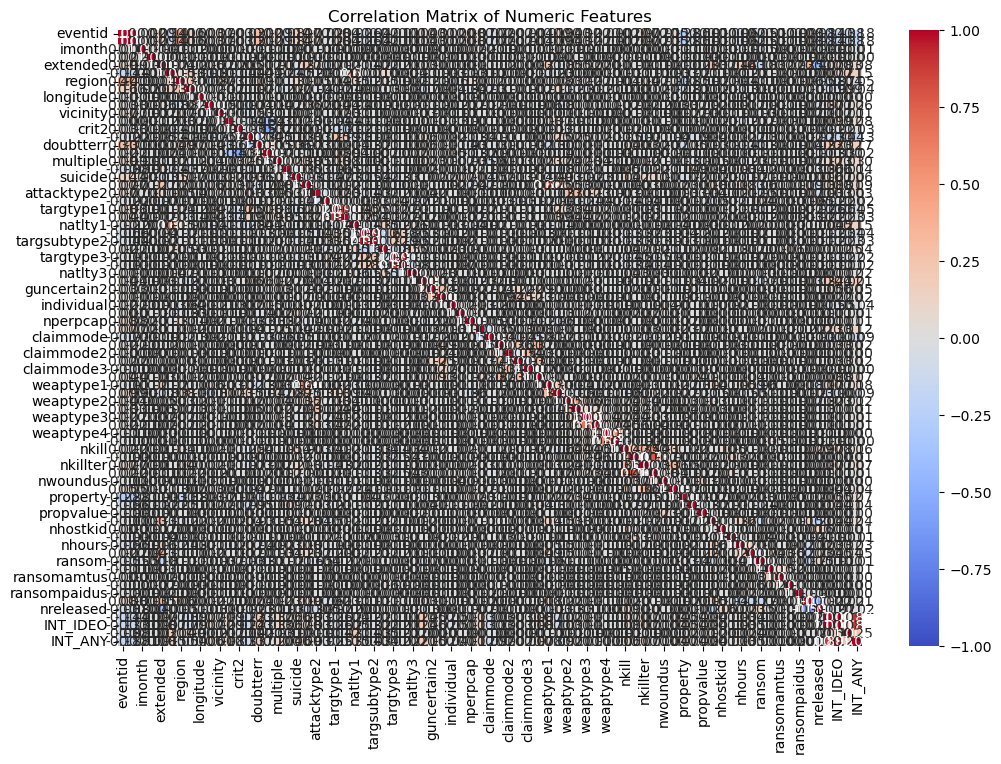

In [86]:
correlation_matrix = df[numeric_cols].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Numeric Features')
plt.show()

Scatter Plot Showing the Relationship Between the Number of Casualties and the Type of Attack

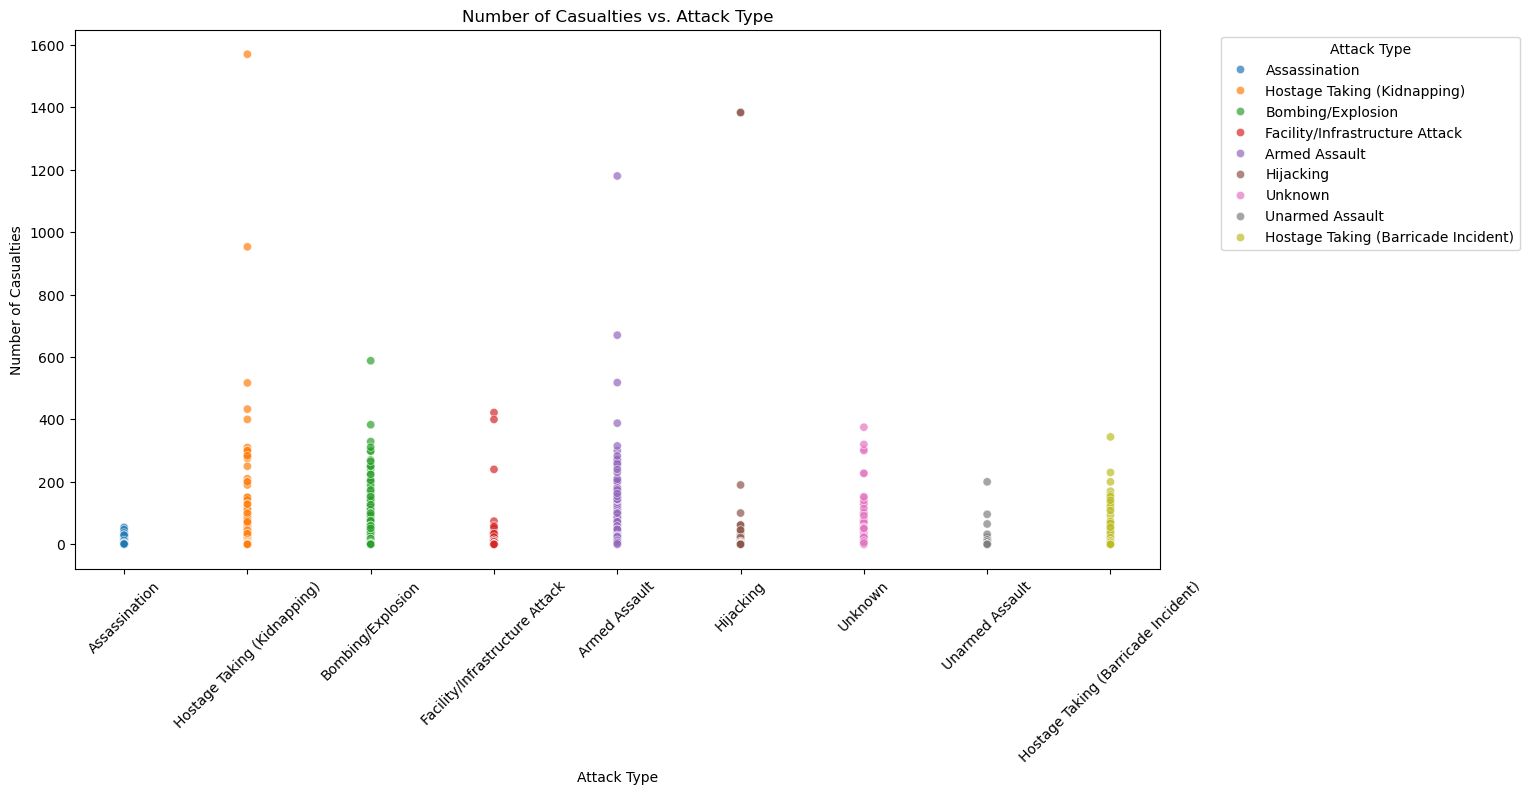

In [89]:
plt.figure(figsize=(14, 7))
sns.scatterplot(x='attacktype1_txt', y='nkill', data=df, hue='attacktype1_txt', alpha=0.7)
plt.xlabel('Attack Type')
plt.ylabel('Number of Casualties')
plt.title('Number of Casualties vs. Attack Type')
plt.xticks(rotation=45)
plt.legend(title='Attack Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

----------------------------------------------------Performance Comparison with Dask----------------------------

Setting Up Dask

In [92]:
pip install dask

Note: you may need to restart the kernel to use updated packages.


Load the Dataset Using Dask

In [119]:
import pandas as pd
import dask.dataframe as dd
import time

In [121]:
file_path = 'globalterrorismdb_0718dist.csv'
df = pd.read_csv(file_path, encoding='ISO-8859-1', low_memory=False)

In [123]:
dask_df = dd.read_csv(file_path, encoding='ISO-8859-1')

In [125]:
start_time = time.time()
pandas_mean = df['nkill'].mean()
pandas_time = time.time() - start_time
print(f"Pandas mean calculation time: {pandas_time} seconds")

Pandas mean calculation time: 0.002473115921020508 seconds


In [127]:
# Time taken for Dask operation
start_time = time.time()
dask_mean = dask_df['nkill'].mean().compute()
dask_time = time.time() - start_time
print(f"Dask mean calculation time: {dask_time} seconds")

Dask mean calculation time: 1.6403729915618896 seconds


In [131]:
start_time = time.time()
dask_attacks_per_year = dask_df.groupby('iyear').size().compute()
dask_time = time.time() - start_time
print(f"Dask attacks per year calculation time: {dask_time} seconds")

Dask attacks per year calculation time: 1.5819976329803467 seconds


In [133]:
start_time = time.time()
dask_attacks_per_region = dask_df.groupby('region_txt').size().compute()
dask_time = time.time() - start_time
print(f"Dask attacks per region calculation time: {dask_time} seconds")

Dask attacks per region calculation time: 1.295663833618164 seconds
